
=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTor

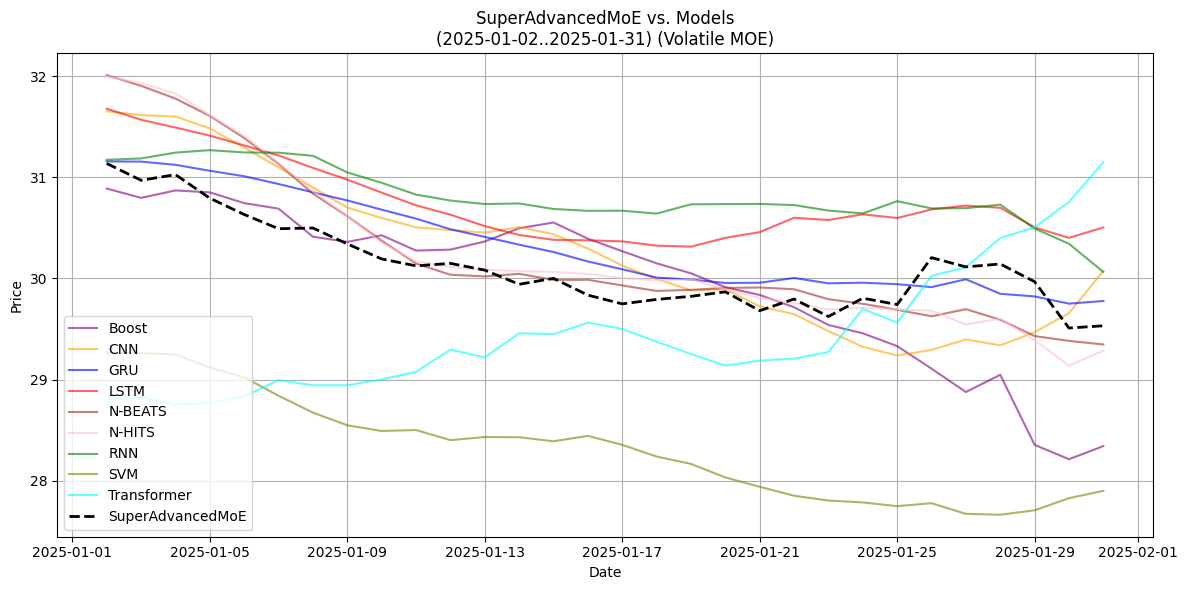

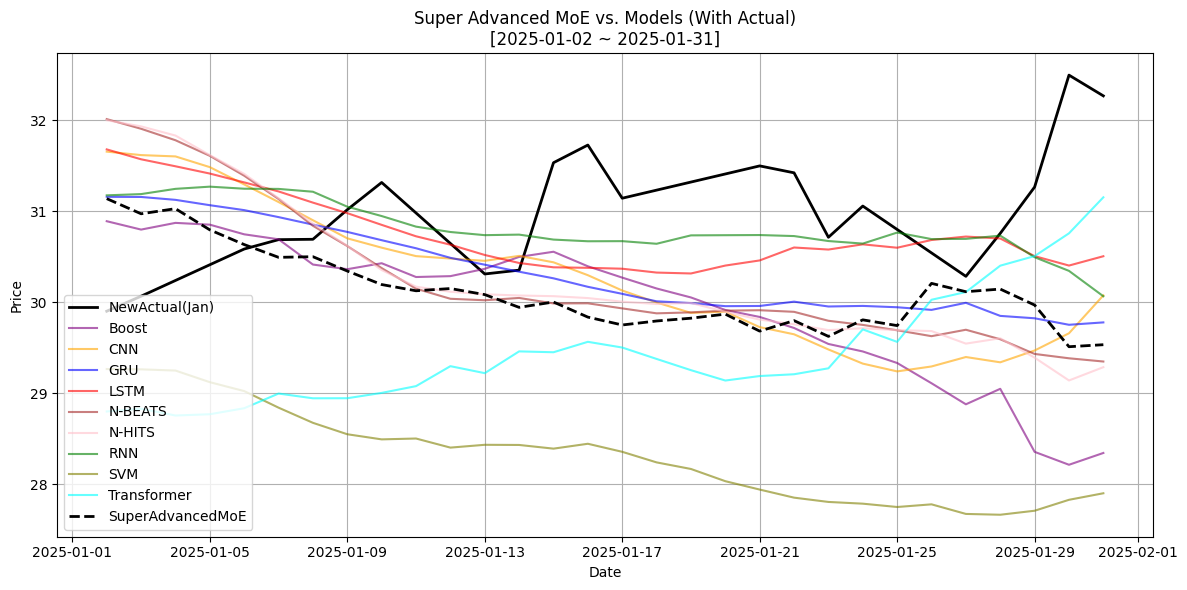

/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

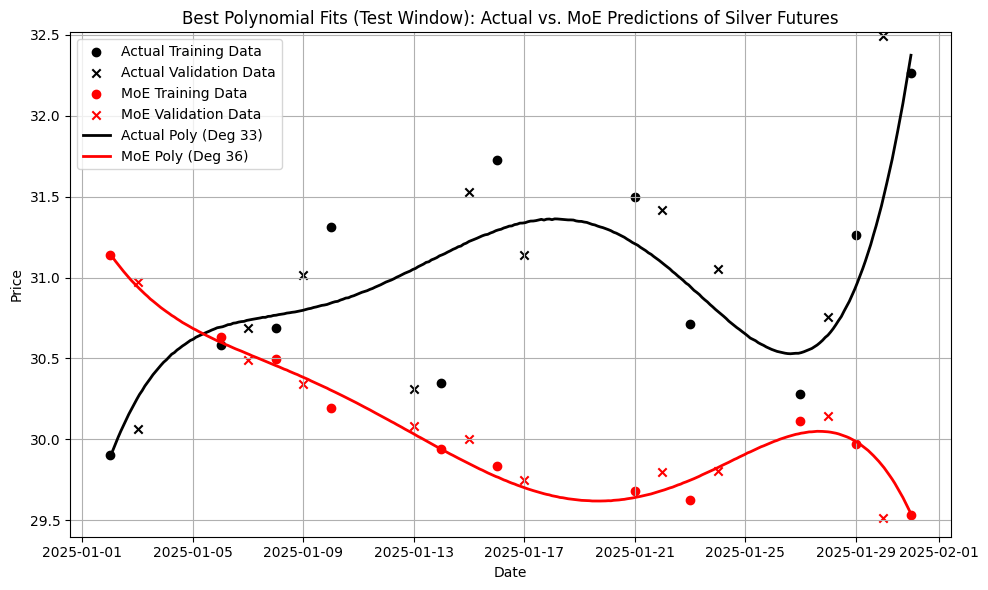


=== Best Polynomial Fitting Results ===
[Actual] => Degree=33, Val MSE=0.196528
     y = 3.1306e-130*x^33+5.7268e-127*x^32-5.2944e-122*x^31-1.6228e-117*x^30-3.3030e-113*x^29-5.3272e-109*x^28-6.4770e-105*x^27-3.8701e-101*x^26+1.1066e-96*x^25+5.3698e-92*x^24+1.5450e-87*x^23+3.5944e-83*x^22+7.3665e-79*x^21+1.3457e-74*x^20+2.1904e-70*x^19+2.8363e-66*x^18+1.8197e-62*x^17-3.9173e-58*x^16-2.2837e-53*x^15-7.0772e-49*x^14-1.7832e-44*x^13-3.9486e-40*x^12-7.7481e-36*x^11-1.3630e-31*x^10-1.8924e-27*x^9-1.6456e-23*x^8+1.9813e-19*x^7+1.5442e-14*x^6+5.0809e-10*x^5+1.2593e-05*x^4+2.5026e-01*x^3+3.3065e+03*x^2-1.4261e+07*x-3.1924e+12

[MoE] => Degree=36, Val MSE=0.015588
     y = -0.0000e+00*x^36-2.5209e-139*x^35-7.3678e-136*x^34+3.6811e-131*x^33+1.2284e-126*x^32+2.6340e-122*x^31+4.5900e-118*x^30+6.4438e-114*x^29+5.9969e-110*x^28-2.3357e-106*x^27-2.9732e-101*x^26-1.0177e-96*x^25-2.6124e-92*x^24-5.7826e-88*x^23-1.1524e-83*x^22-2.0581e-79*x^21-3.2609e-75*x^20-4.2884e-71*x^19-3.0768e-67*x^18+6.1757e-63*x

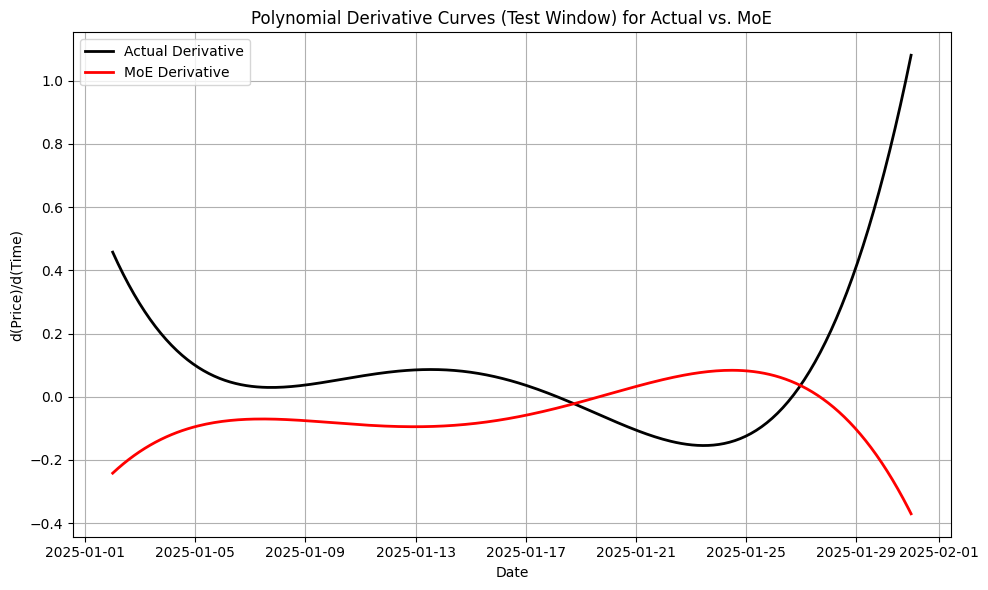


All done with MoE + polynomial fittings for both Actual and MoE!


In [8]:
####################################################
# SUPER ADVANCED MOE SCRIPT (WITH ACTUAL & POLYNOMIALS)
####################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

# Global seeds & device
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BEST_MODELS_DIR = "."   # Where .pt/.pkl model files are stored
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

############################################
# 1) Model Definitions & Loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type == "CNN":
            self.conv1 = nn.Conv1d(4, 64, 3)
            self.conv2 = nn.Conv1d(64, 128, 3)
            with torch.no_grad():
                dummy = torch.zeros(1, 4, window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size, 4)

        elif model_type == "LSTM":
            self.rnn = nn.LSTM(4, 128, num_layers=2, batch_first=True, dropout=0.05)
            self.fc = nn.Linear(128, 4)

        elif model_type == "GRU":
            self.rnn = nn.GRU(4, 128, num_layers=2, batch_first=True, dropout=0.05)
            self.fc = nn.Linear(128, 4)

        elif model_type == "RNN":
            self.rnn = nn.RNN(4, 128, num_layers=2, nonlinearity="relu", batch_first=True, dropout=0.05)
            self.fc = nn.Linear(128, 4)

        elif model_type == "EnhancedLSTM":
            self.rnn = nn.LSTM(4, 128, num_layers=3, batch_first=True, dropout=0.1)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout = nn.Dropout(0.1)
            self.fc = nn.Linear(128, 4)

        elif model_type == "Transformer":
            self.input_linear = nn.Linear(4, 128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.05)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)

        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type == "CNN":
            x = x.permute(0,2,1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            return self.fc(x)

        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _ = self.rnn(x)
            out = out[:,-1,:]
            return self.fc(out)

        elif self.model_type == "EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)

        elif self.model_type == "Transformer":
            x = self.input_linear(x)
            x = x.permute(1,0,2)
            x = self.transformer_encoder(x)
            x = x[-1,:,:]
            return self.fc(x)

        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat = x.reshape(x.size(0), -1)
            forecast = 0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast

        else:
            raise ValueError("Invalid model_type")

class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self): pass
    def __call__(self, x):
        return self.forward(x)

def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)

############################################
# 2) Load & Scale Data
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    df_train = pd.read_csv(train_csv)
    df_train["Date"] = pd.to_datetime(df_train["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_train.columns:
            df_train.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_train.columns:
            df_train[feat]= np.nan
        else:
            df_train[feat]= df_train[feat].astype(str).str.replace(",", "", regex=True)
            df_train[feat]= pd.to_numeric(df_train[feat], errors="coerce")

    df_train.sort_values("Date", inplace=True)
    df_train.reset_index(drop=True, inplace=True)

    train_cutoff= pd.to_datetime("2024-07-01")
    val_cutoff  = pd.to_datetime("2024-11-30")
    test_cutoff = pd.to_datetime("2024-12-01")

    df_trn= df_train[df_train["Date"]< train_cutoff].copy()
    df_val= df_train[(df_train["Date"]>= train_cutoff)&(df_train["Date"]<= val_cutoff)].copy()
    df_tst= df_train[df_train["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])
    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])
    df_tst_scaled= df_tst.copy()
    trn_mins= df_trn_nonan[features].min()
    df_tst_filled= df_tst_scaled[features].fillna(trn_mins)
    df_tst_scaled.loc[:, features]= scaler.transform(df_tst_filled)

    df_scaled= pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)

    # also load complete
    df_complete= pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler

############################################
# 3) Rolling Forecast
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.05):
    """
    Rolling forecast with mild random noise => more "volatility".
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        # add a little random noise => final to get more "volatile" predictions
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)

def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30,
    do_daily_plots=False
):
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()} w/ noise => more volatility")

        # load each model
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        daily_fcst={}
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01   # control final volatility
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                daily_fcst[mt]= df_fc
                all_records.append(df_fc)
            else:
                daily_fcst[mt]= pd.DataFrame()

        # optional daily plots
        if do_daily_plots and (day_i== date_rng[-1]):
            pass

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all

############################################
# 4) Advanced MoE (Population Voting w/ mini-model approach)
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    For each (model, baseDate) => measure january performance => mae, slope alignment, volatility alignment
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")
    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    # pred vol => stdev of dayChange
    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_): vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)
    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))
    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0- ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    1) Build "mini-models" => (model, baseDate)
    2) Weighted sum => MoE
    3) population shift => up/down
    4) random noise => final volatility
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-02")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")
    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today>pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc* slopeA* volA* dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe

def plot_super_advanced_moe_vs_models(final_rolling_fcst, df_moe,
                                      from_d=pd.to_datetime("2025-01-02"),
                                      to_d=pd.to_datetime("2025-01-31")):
    """
    Plots all 9 models + super advanced MoE in [from_d..to_d], no actual overlay.
    """
    df_sel= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= from_d)&
        (final_rolling_fcst["ForecastDate"]<= to_d)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","GPR":"teal","Boost":"purple"
    }
    for m in df_sel["Model"].unique():
        df_m= df_sel[df_sel["Model"]== m].copy()
        df_m_agg= df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(m,"gray")
        plt.plot(df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"], color=c, alpha=0.6, label=m)

    df_moe_sub= df_moe[
        (df_moe["ForecastDate"]>= from_d)&
        (df_moe["ForecastDate"]<= to_d)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
                 color="black",linestyle="--",lw=2, label="SuperAdvancedMoE")

    plt.title(f"SuperAdvancedMoE vs. Models\n({from_d.date()}..{to_d.date()}) (Volatile MOE)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 5) Polynomial Fitting for BOTH Actual & MoE
############################################
def polynomial_fitting_actual_and_moe(
    df_moe,
    csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
    max_degree=70
):
    """
    Similar to earlier "multi-column" approach:
      - Merge actual data & MoE data into 1 DataFrame
      - Fit polynomials (1..max_degree) for both "Actual" and "MOE_Price"
      - Plot best polynomial fits in a single figure
      - Plot derivative curves in a single figure
      - Print expressions for each
    """

    # -- A) Read actual data and merge with MoE
    df_actual = pd.read_csv(csv_actual)
    df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_actual.columns:
            df_actual.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_actual.columns:
        df_actual["Price"] = df_actual["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_actual.sort_values("Date", inplace=True)
    df_actual.reset_index(drop=True, inplace=True)

    # rename MoE
    df_moe_rename = df_moe.rename(columns={"ForecastDate":"Date", "MOE_Price":"MoE"})
    df_moe_rename.sort_values("Date", inplace=True)
    df_moe_rename.reset_index(drop=True, inplace=True)

    # Merge => have columns: Date, MoE, Price
    # We'll rename Price -> Actual
    df_merge = pd.merge(
        df_moe_rename,
        df_actual[["Date","Price"]],
        on="Date", how="inner"
    ).rename(columns={"Price":"Actual"})

    if df_merge.empty:
        print("No overlapping dates between df_moe and actual data. Cannot do polynomial fitting.")
        return

    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    # We will do a train/val approach for each column (Actual, MoE).
    # One DataFrame with columns: ["Date", "Actual", "MoE"].
    # For train/val split, we use the even index => train, odd index => val (like before).
    # We'll store best polynomials for each column in a dict: best_poly_info[column].
    columns_to_fit = ["Actual", "MoE"]

    # Create numeric axis from Date
    df_merge["mdates_num"] = mdates.date2num(df_merge["Date"])
    n_points = len(df_merge)
    indices = np.arange(n_points)
    train_mask = (indices % 2 == 0)
    val_mask   = ~train_mask

    # For convenience in plotting train vs. val for "Actual," we do:
    #   "Actual" train => black circle,
    #   "Actual" val => black x,
    #   "MoE" train => red circle,
    #   "MoE" val => red x,
    color_map = {"Actual":"black", "MoE":"red"}

    best_poly_info = {}

    def format_poly(coeffs):
        terms=[]
        deg = len(coeffs)-1
        for i,c in enumerate(coeffs):
            p = deg - i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr="".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr=expr[1:]
        return expr

    # ---------- Fit polynomials for each column ------------
    for col in columns_to_fit:
        x_train = df_merge.loc[train_mask, "mdates_num"].values
        y_train = df_merge.loc[train_mask, col].values

        x_val   = df_merge.loc[val_mask, "mdates_num"].values
        y_val   = df_merge.loc[val_mask, col].values

        best_deg=None
        best_mse=float("inf")
        best_coefs=None

        for deg_ in range(1, max_degree+1):
            coefs = np.polyfit(x_train, y_train, deg_)
            preds_val = np.polyval(coefs, x_val)
            val_mse = mean_squared_error(y_val, preds_val)
            if val_mse< best_mse:
                best_mse= val_mse
                best_deg= deg_
                best_coefs= coefs

        best_poly_info[col] = {
            "degree": best_deg,
            "mse": best_mse,
            "coeffs": best_coefs
        }

    # ---------- Plot best polynomial fits in one figure ------------
    plt.figure(figsize=(10,6))
    # Plot actual data points: train => black circle, val => black x
    plt.scatter(df_merge.loc[train_mask, "Date"], df_merge.loc[train_mask, "Actual"],
                color="black", marker="o", label="Actual Training Data")
    plt.scatter(df_merge.loc[val_mask, "Date"], df_merge.loc[val_mask, "Actual"],
                color="black", marker="x", label="Actual Validation Data")
    # Plot MoE data points: train => red circle, val => red x
    plt.scatter(df_merge.loc[train_mask, "Date"], df_merge.loc[train_mask, "MoE"],
                color="red", marker="o", label="MoE Training Data")
    plt.scatter(df_merge.loc[val_mask, "Date"], df_merge.loc[val_mask, "MoE"],
                color="red", marker="x", label="MoE Validation Data")

    # Create a dense x-axis for plotting polynomials
    x_dense = np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 300)
    x_dense_dates = [mdates.num2date(xx) for xx in x_dense]

    for col in columns_to_fit:
        info = best_poly_info[col]
        deg_ = info["degree"]
        coefs_ = info["coeffs"]
        color_ = color_map.get(col, "gray")
        y_dense = np.polyval(coefs_, x_dense)
        plt.plot(x_dense_dates, y_dense, color=color_,
                 linewidth=2, label=f"{col} Poly (Deg {deg_})")

    plt.title("Best Polynomial Fits (Test Window): Actual vs. MoE Predictions of Silver Futures")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---------- Print out polynomial expressions ------------
    print("\n=== Best Polynomial Fitting Results ===")
    for col in columns_to_fit:
        deg_   = best_poly_info[col]["degree"]
        mse_   = best_poly_info[col]["mse"]
        coefs_ = best_poly_info[col]["coeffs"]
        expr_  = format_poly(coefs_)
        print(f"[{col}] => Degree={deg_}, Val MSE={mse_:.6f}")
        print(f"     y = {expr_}\n")

    # ---------- Derivative curves in a single figure ------------
    plt.figure(figsize=(10,6))

    for col in columns_to_fit:
        coefs_ = best_poly_info[col]["coeffs"]
        d_coefs_ = np.polyder(coefs_)
        d_expr_  = format_poly(d_coefs_)
        y_deriv  = np.polyval(d_coefs_, x_dense)

        color_ = color_map.get(col, "gray")
        plt.plot(x_dense_dates, y_deriv, color=color_, linewidth=2, label=f"{col} Derivative")

        print(f"=== Derivative for {col} (Degree {best_poly_info[col]['degree']} => {best_poly_info[col]['degree']-1}) ===")
        print(f"   d/dx of {col} = {d_expr_}\n")

    plt.title("Polynomial Derivative Curves (Test Window) for Actual vs. MoE")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


############################################
# 6) (Optional) "Super Advanced MoE vs. Models (With Actual...)" 
############################################
def load_feb_actual_data(csv_file="Silver Futures Historical Data_Final Pure Predictions.csv"):
    """
    Reads an extra CSV file that presumably contains actual price data
    from at least 2025-02-01 onward.
    Returns a DataFrame with columns: ["Date", "Price", ...].
    """
    df_feb = pd.read_csv(csv_file)
    df_feb["Date"] = pd.to_datetime(df_feb["Date"], errors="coerce")
    for col in ["Vol.", "Change %"]:
        if col in df_feb.columns:
            df_feb.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_feb.columns:
        df_feb["Price"] = df_feb["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_feb.sort_values("Date", inplace=True)
    df_feb.reset_index(drop=True, inplace=True)
    return df_feb

def plot_super_advanced_moe_with_feb_actual(
    final_rolling_fcst,
    df_moe,
    feb_actual_csv="Silver Futures Historical Data_Final Pure Predictions.csv",
    start_plot=pd.to_datetime("2025-01-02"),
    end_plot=pd.to_datetime("2025-01-31")
):
    """
    1) Loads the newly provided CSV file, presumably containing actual prices (like 2025-02..).
    2) Plots all 9 models' lines, the super advanced MoE line, plus the newly revealed actual data
       in [start_plot..end_plot].
    """
    df_feb_actual = load_feb_actual_data(feb_actual_csv)
    mask_feb = (df_feb_actual["Date"] >= start_plot) & (df_feb_actual["Date"] <= end_plot)
    df_feb_filtered = df_feb_actual.loc[mask_feb].copy()

    df_fc = final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"] >= start_plot) &
        (final_rolling_fcst["ForecastDate"] <= end_plot)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM": "red",
        "GRU": "blue",
        "RNN": "green",
        "CNN": "orange",
        "EnhancedLSTM": "magenta",
        "Transformer": "cyan",
        "N-BEATS": "brown",
        "N-HITS": "pink",
        "SVM": "olive",
        "GPR": "teal",
        "Boost": "purple"
    }

    if not df_feb_filtered.empty and "Price" in df_feb_filtered.columns:
        plt.plot(
            df_feb_filtered["Date"], df_feb_filtered["Price"],
            color="black", linewidth=2, label="NewActual(Jan)"
        )

    for m in df_fc["Model"].unique():
        df_m = df_fc[df_fc["Model"] == m].copy()
        df_m_agg = df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c = color_map.get(m, "gray")
        plt.plot(
            df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"],
            color=c, alpha=0.6, label=m
        )

    df_moe_sub = df_moe[
        (df_moe["ForecastDate"] >= start_plot) &
        (df_moe["ForecastDate"] <= end_plot)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(
            df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
            color="black", linestyle="--", linewidth=2, label="SuperAdvancedMoE"
        )

    plt.title(f"Super Advanced MoE vs. Models (With Actual)\n[{start_plot.date()} ~ {end_plot.date()}]")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 7) MAIN USAGE EXAMPLE
############################################
if __name__=="__main__":
    # 1) Load & scale
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling forecasts => final_rolling_fc
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"],
        start_train_cutoff=pd.to_datetime("2024-07-01"),
        start_val_cutoff=pd.to_datetime("2024-11-30"),
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30,
        do_daily_plots=False
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(40))

    # 3) Build "super advanced" mixture-of-experts
    df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)

    # 4) Plot => from 2025-01-02..2025-01-31 => models vs MoE
    plot_super_advanced_moe_vs_models(
        final_rolling_fc,
        df_moe,
        from_d=pd.to_datetime("2025-01-02"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 5) (Optional) overlay newly revealed actual data:
    plot_super_advanced_moe_with_feb_actual(
        final_rolling_fcst=final_rolling_fc,
        df_moe=df_moe,
        feb_actual_csv="Silver Futures Historical Data_Final Pure Predictions.csv",
        start_plot=pd.to_datetime("2025-01-02"),
        end_plot=pd.to_datetime("2025-01-31")
    )

    # 6) Fit polynomials (up to degree=70) for both Actual & MoE, then plot & print results
    polynomial_fitting_actual_and_moe(
        df_moe,
        csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
        max_degree=70
    )

    print("\nAll done with MoE + polynomial fittings for both Actual and MoE!")



=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTor

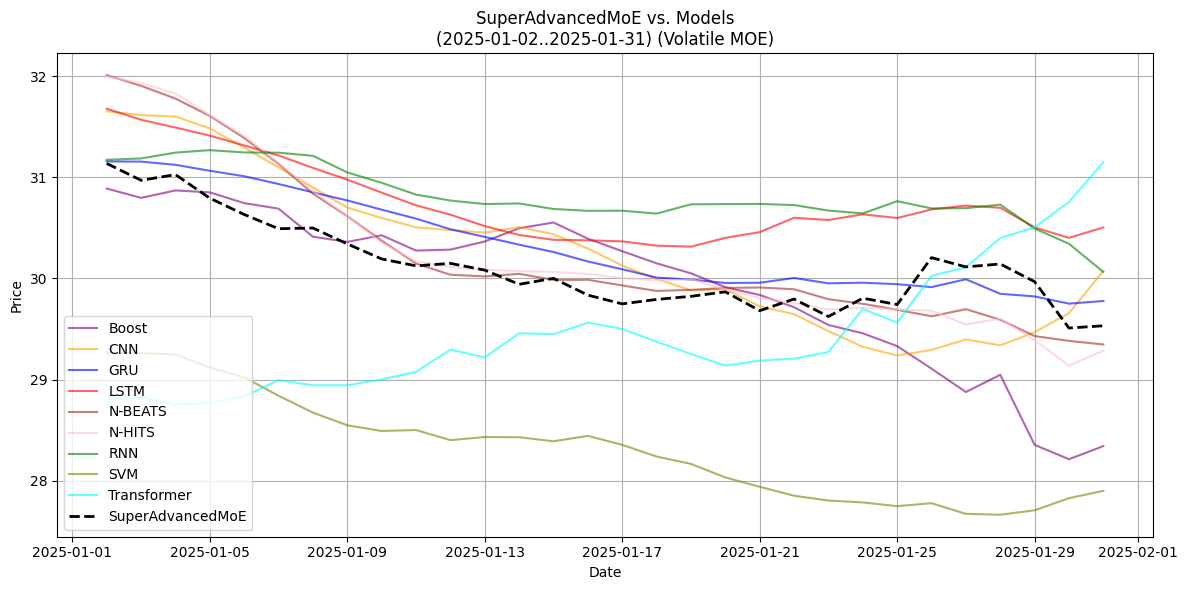

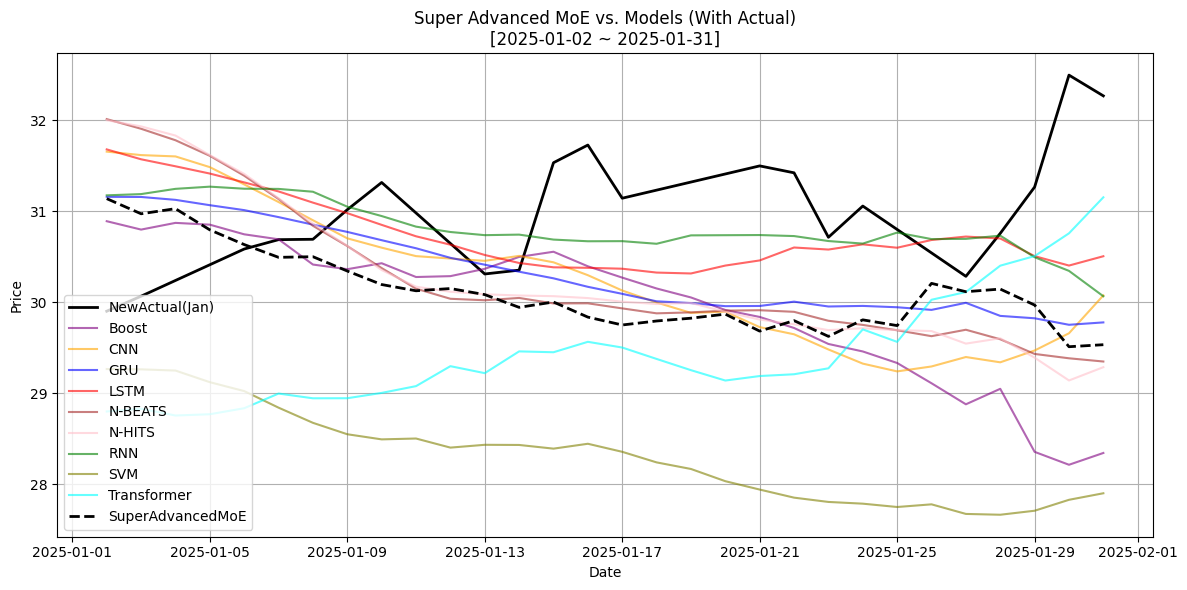

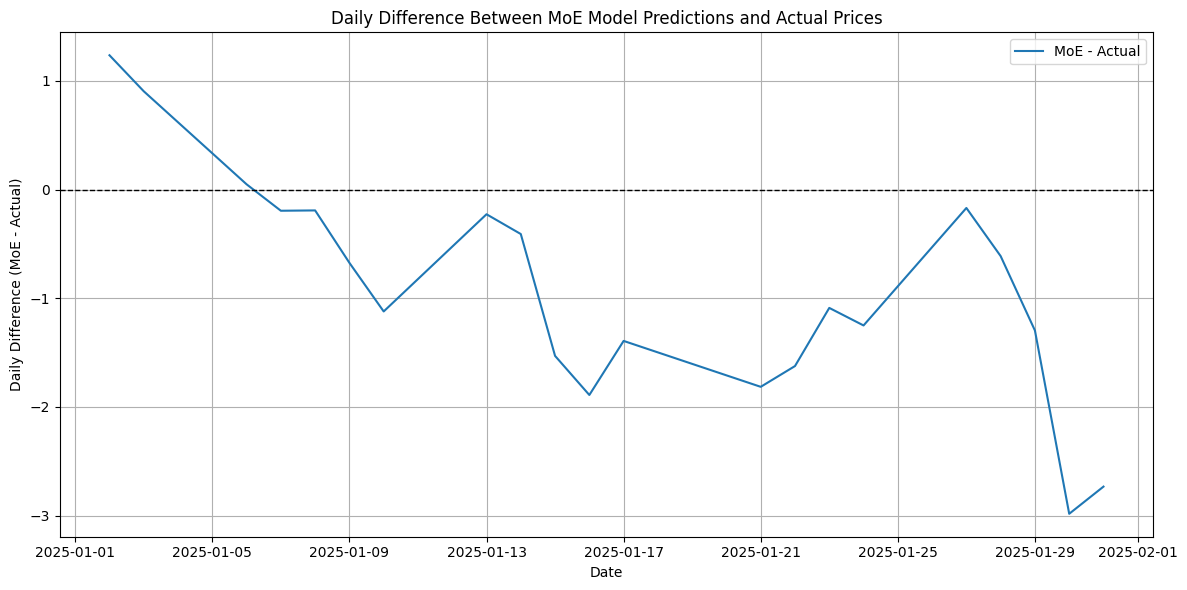


=== Best Polynomial Fit for MoE Curve ===
  Degree = 36,  Validation MSE = 0.015588
  Polynomial Expression:
     y = -0.0000e+00*x^36-2.5209e-139*x^35-7.3678e-136*x^34+3.6811e-131*x^33+1.2284e-126*x^32+2.6340e-122*x^31+4.5900e-118*x^30+6.4438e-114*x^29+5.9969e-110*x^28-2.3357e-106*x^27-2.9732e-101*x^26-1.0177e-96*x^25-2.6124e-92*x^24-5.7826e-88*x^23-1.1524e-83*x^22-2.0581e-79*x^21-3.2609e-75*x^20-4.2884e-71*x^19-3.0768e-67*x^18+6.1757e-63*x^17+3.4193e-58*x^16+1.0763e-53*x^15+2.7432e-49*x^14+6.1592e-45*x^13+1.2524e-40*x^12+2.2804e-36*x^11+3.6296e-32*x^10+4.3107e-28*x^9+1.2996e-24*x^8-1.3787e-19*x^7-6.0822e-15*x^6-1.7547e-10*x^5-4.0749e-06*x^4-7.6521e-02*x^3-9.2891e+02*x^2+7.3805e+06*x+1.0396e+12



/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

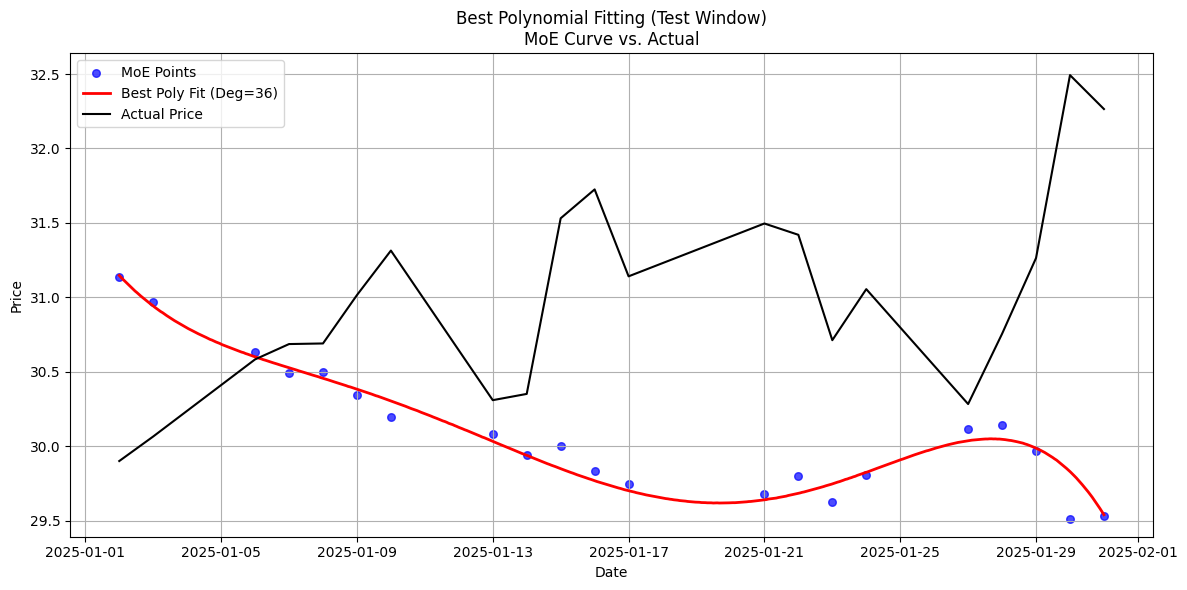

=== Polynomial Derivative Expression for MoE ===
If best polynomial is degree 36, derivative is degree 35:
d/dx of MoE(x) = -0.0000e+00*x^35-8.8230e-138*x^34-2.5051e-134*x^33+1.2148e-129*x^32+3.9308e-125*x^31+8.1655e-121*x^30+1.3770e-116*x^29+1.8687e-112*x^28+1.6791e-108*x^27-6.3064e-105*x^26-7.7302e-100*x^25-2.5441e-95*x^24-6.2697e-91*x^23-1.3300e-86*x^22-2.5352e-82*x^21-4.3221e-78*x^20-6.5217e-74*x^19-8.1480e-70*x^18-5.5383e-66*x^17+1.0499e-61*x^16+5.4708e-57*x^15+1.6145e-52*x^14+3.8405e-48*x^13+8.0070e-44*x^12+1.5029e-39*x^11+2.5084e-35*x^10+3.6296e-31*x^9+3.8796e-27*x^8+1.0397e-23*x^7-9.6511e-19*x^6-3.6493e-14*x^5-8.7737e-10*x^4-1.6300e-05*x^3-2.2956e-01*x^2-1.8578e+03*x+7.3805e+06



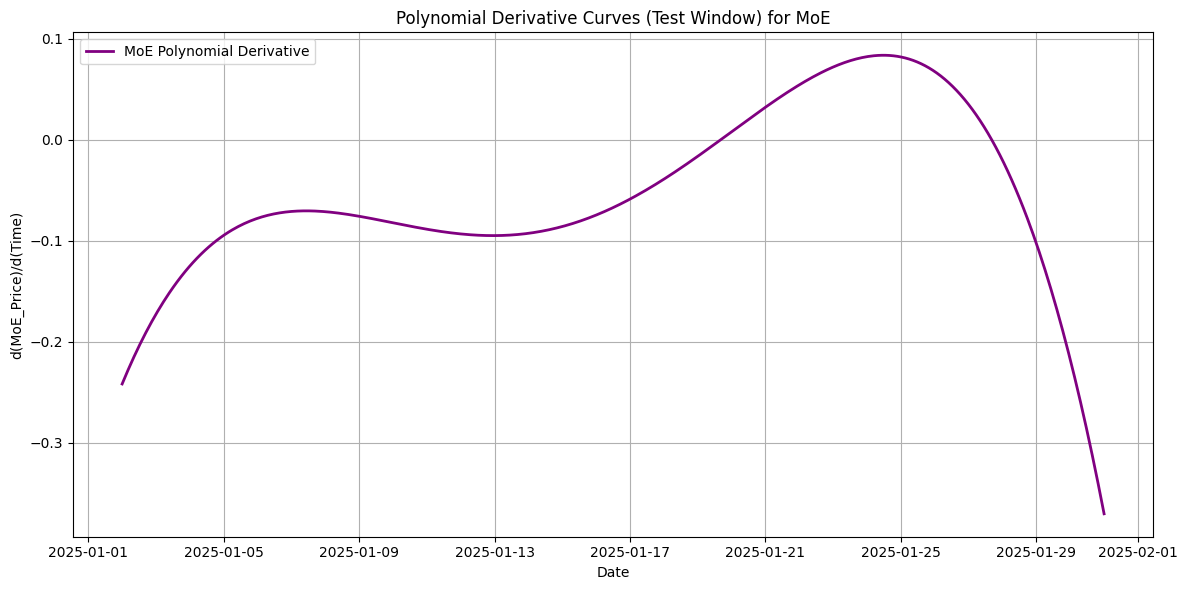


All done with Super Advanced MoE, including polynomial fitting & derivatives for MoE predictions!


In [7]:
####################################################
# SUPER ADVANCED MOE SCRIPT (Encouraging Volatility)
#         with Polynomial Fitting & Derivatives
####################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

# Global seeds & device
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BEST_MODELS_DIR = "."   # Where .pt/.pkl model files are stored
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

############################################
# 1) Model Definitions & Loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type == "CNN":
            self.conv1 = nn.Conv1d(4, 64, 3)
            self.conv2 = nn.Conv1d(64, 128, 3)
            with torch.no_grad():
                dummy = torch.zeros(1, 4, window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size, 4)

        elif model_type == "LSTM":
            self.rnn = nn.LSTM(4, 128, num_layers=2, batch_first=True, dropout=0.05)
            self.fc = nn.Linear(128, 4)

        elif model_type == "GRU":
            self.rnn = nn.GRU(4, 128, num_layers=2, batch_first=True, dropout=0.05)
            self.fc = nn.Linear(128, 4)

        elif model_type == "RNN":
            self.rnn = nn.RNN(4, 128, num_layers=2, nonlinearity="relu", batch_first=True, dropout=0.05)
            self.fc = nn.Linear(128, 4)

        elif model_type == "EnhancedLSTM":
            self.rnn = nn.LSTM(4, 128, num_layers=3, batch_first=True, dropout=0.1)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout = nn.Dropout(0.1)
            self.fc = nn.Linear(128, 4)

        elif model_type == "Transformer":
            self.input_linear = nn.Linear(4, 128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.05)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)

        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type == "CNN":
            x = x.permute(0,2,1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            return self.fc(x)

        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _ = self.rnn(x)
            out = out[:,-1,:]
            return self.fc(out)

        elif self.model_type == "EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)

        elif self.model_type == "Transformer":
            x = self.input_linear(x)
            x = x.permute(1,0,2)
            x = self.transformer_encoder(x)
            x = x[-1,:,:]
            return self.fc(x)

        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat = x.reshape(x.size(0), -1)
            forecast = 0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast

        else:
            raise ValueError("Invalid model_type")

class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self): pass
    def __call__(self, x):
        return self.forward(x)

def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)

############################################
# 2) Load & Scale Data
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    df_train = pd.read_csv(train_csv)
    df_train["Date"] = pd.to_datetime(df_train["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_train.columns:
            df_train.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_train.columns:
            df_train[feat]= np.nan
        else:
            df_train[feat]= df_train[feat].astype(str).str.replace(",", "", regex=True)
            df_train[feat]= pd.to_numeric(df_train[feat], errors="coerce")

    df_train.sort_values("Date", inplace=True)
    df_train.reset_index(drop=True, inplace=True)

    train_cutoff= pd.to_datetime("2024-07-01")
    val_cutoff  = pd.to_datetime("2024-11-30")
    test_cutoff = pd.to_datetime("2024-12-01")

    df_trn= df_train[df_train["Date"]< train_cutoff].copy()
    df_val= df_train[(df_train["Date"]>= train_cutoff)&(df_train["Date"]<= val_cutoff)].copy()
    df_tst= df_train[df_train["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])
    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])
    df_tst_scaled= df_tst.copy()
    trn_mins= df_trn_nonan[features].min()
    df_tst_filled= df_tst_scaled[features].fillna(trn_mins)
    df_tst_scaled.loc[:, features]= scaler.transform(df_tst_filled)

    df_scaled= pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)

    # also load complete
    df_complete= pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler

############################################
# 3) Rolling Forecast
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.05):
    """
    Like before, but we allow a mild random noise for final predictions => more "volatility".
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        # add a little random noise => final to get more "volatile" predictions
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)

def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30,
    do_daily_plots=False
):
    """
    Similar to your skeleton's approach,
    but we keep mild random noise => more "volatile" predictions.
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()} w/ noise => more volatility")

        # load each model
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        daily_fcst={}
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01   # control final volatility
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                daily_fcst[mt]= df_fc
                all_records.append(df_fc)
            else:
                daily_fcst[mt]= pd.DataFrame()

        # optional daily plot
        if do_daily_plots and (day_i== date_rng[-1]):
            pass

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all

############################################
# 4) Advanced MoE (Population Voting w/ mini-model approach)
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    For each (model, baseDate) => measure january performance => mae, polynomial slope, volatility alignment
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")
    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae per (model, baseDate)
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    # pred vol => stdev of dayChange
    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_): vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)
    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))
    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0- ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    1) Build "mini-models" => (model, baseDate)
    2) For day d => gather each mini-model => Weighted sum => MoE
    3) population voting => shift up/down if >70% say up or down
    4) encourage final predictions to be "volatile" by adding random noise
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    # create dictionary => {(model,baseDate): {baseAcc, slopeAlign_jan, volAlign_jan}}
    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-02")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")
    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0

        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today>pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc* slopeA* volA* dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        # final mild random noise => encourage more "volatility"
        day_moe+= np.random.normal(0, day_moe*0.002)

        records.append({
            "ForecastDate": d,
            "MOE_Price": day_moe
        })

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe

def plot_super_advanced_moe_vs_models(final_rolling_fcst, df_moe,
                                      from_d=pd.to_datetime("2025-01-02"),
                                      to_d=pd.to_datetime("2025-01-31")):
    """
    Plots all 9 models + super advanced MoE in [from_d..to_d], with no actual overlay.
    """
    df_sel= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= from_d)&
        (final_rolling_fcst["ForecastDate"]<= to_d)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","GPR":"teal","Boost":"purple"
    }
    for m in df_sel["Model"].unique():
        df_m= df_sel[df_sel["Model"]== m].copy()
        df_m_agg= df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(m,"gray")
        plt.plot(df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"], color=c, alpha=0.6, label=m)

    df_moe_sub= df_moe[
        (df_moe["ForecastDate"]>= from_d)&
        (df_moe["ForecastDate"]<= to_d)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
                 color="black",linestyle="--",lw=2, label="SuperAdvancedMoE")

    plt.title(f"SuperAdvancedMoE vs. Models\n({from_d.date()}..{to_d.date()}) (Volatile MOE)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 5) Polynomial Fitting & Derivatives for MoE
############################################
def polynomial_fitting_and_derivatives_for_moe(
    df_moe,
    df_actual_csv="Silver Futures Historical Data_Final Pure Predictions.csv"
):
    """
    1) Load the actual data from df_actual_csv
    2) Merge with df_moe => must have overlapping dates in the range of df_moe["ForecastDate"].
    3) Plot daily difference (MoE - Actual)
    4) Pick best polynomial degree (1..65) with an even/odd train/val scheme
    5) Plot polynomial & derivative; print expressions
    """
    # A) Load the "final" actual data from CSV
    df_actual = pd.read_csv(df_actual_csv)
    df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
    for col in ["Vol.", "Change %"]:
        if col in df_actual.columns:
            df_actual.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_actual.columns:
        df_actual["Price"] = df_actual["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_actual.sort_values("Date", inplace=True)
    df_actual.reset_index(drop=True, inplace=True)

    # B) Merge with MoE data
    df_merge = df_moe.copy()
    df_merge = df_merge.rename(columns={"ForecastDate":"Date"})
    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    # Filter actual data to [moe_start..moe_end]
    moe_start = df_merge["Date"].min()
    moe_end   = df_merge["Date"].max()
    mask_test = (df_actual["Date"] >= moe_start) & (df_actual["Date"] <= moe_end)
    df_test_actual = df_actual.loc[mask_test, ["Date","Price"]].copy()
    df_test_actual.dropna(subset=["Price"], inplace=True)
    df_test_actual.sort_values("Date", inplace=True)
    df_test_actual.reset_index(drop=True, inplace=True)

    # Merge
    df_merge = pd.merge(df_merge, df_test_actual, on="Date", how="inner")
    df_merge.rename(columns={"Price":"Actual"}, inplace=True)

    if df_merge.empty:
        print("No overlapping dates between df_moe and df_actual. Cannot do polynomial fitting.")
        return

    # C) Daily Difference Plot
    df_merge["MoE_Diff"] = df_merge["MOE_Price"] - df_merge["Actual"]
    plt.figure(figsize=(12,6))
    plt.plot(df_merge["Date"], df_merge["MoE_Diff"], label="MoE - Actual", linewidth=1.5)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel("Date")
    plt.ylabel("Daily Difference (MoE - Actual)")
    plt.title("Daily Difference Between MoE Model Predictions and Actual Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # D) Polynomial Fitting
    df_merge["mdates_num"] = mdates.date2num(df_merge["Date"])
    n_points = len(df_merge)
    indices = np.arange(n_points)
    train_mask = (indices % 2 == 0)
    val_mask   = ~train_mask

    x_train = df_merge.loc[train_mask, "mdates_num"].values
    y_train = df_merge.loc[train_mask, "MOE_Price"].values
    x_val   = df_merge.loc[val_mask,   "mdates_num"].values
    y_val   = df_merge.loc[val_mask,   "MOE_Price"].values

    def format_polynomial(coeffs):
        terms = []
        deg = len(coeffs) - 1
        for i,c in enumerate(coeffs):
            power = deg - i
            if power>1:
                terms.append(f"{c:+.4e}*x^{power}")
            elif power==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr = "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr = expr[1:]
        return expr

    best_deg=None
    best_mse=float("inf")
    best_coeffs=None
    for d in range(1,66):
        coeffs = np.polyfit(x_train, y_train, d)
        pred_val = np.polyval(coeffs, x_val)
        val_mse  = mean_squared_error(y_val, pred_val)
        if val_mse< best_mse:
            best_mse= val_mse
            best_deg= d
            best_coeffs= coeffs

    poly_expr = format_polynomial(best_coeffs)
    print("\n=== Best Polynomial Fit for MoE Curve ===")
    print(f"  Degree = {best_deg},  Validation MSE = {best_mse:.6f}")
    print(f"  Polynomial Expression:\n     y = {poly_expr}\n")

    # E) Plot the best-fitting polynomial
    x_dense = np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 500)
    y_dense = np.polyval(best_coeffs, x_dense)
    x_dense_dates = [mdates.num2date(xx) for xx in x_dense]

    plt.figure(figsize=(12,6))
    plt.scatter(df_merge["Date"], df_merge["MOE_Price"], color="blue", s=30, alpha=0.7, label="MoE Points")
    plt.plot(x_dense_dates, y_dense, color="red", linewidth=2, label=f"Best Poly Fit (Deg={best_deg})")
    # Also overlay Actual
    plt.plot(df_merge["Date"], df_merge["Actual"], color="black", linewidth=1.5, label="Actual Price")
    plt.title("Best Polynomial Fitting (Test Window)\nMoE Curve vs. Actual")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # F) Polynomial Derivative
    d_coeffs = np.polyder(best_coeffs)
    d_expr = format_polynomial(d_coeffs)
    print("=== Polynomial Derivative Expression for MoE ===")
    print(f"If best polynomial is degree {best_deg}, derivative is degree {best_deg - 1}:")
    print(f"d/dx of MoE(x) = {d_expr}\n")

    y_deriv = np.polyval(d_coeffs, x_dense)
    plt.figure(figsize=(12,6))
    plt.plot(x_dense_dates, y_deriv, color="purple", linewidth=2, label="MoE Polynomial Derivative")
    plt.title("Polynomial Derivative Curves (Test Window) for MoE")
    plt.xlabel("Date")
    plt.ylabel("d(MoE_Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 6) "Super Advanced MoE vs. Models (With Actual from 'Silver Futures Historical Data_Final Pure Predictions.csv')"
############################################
def load_feb_actual_data(csv_file="Silver Futures Historical Data_Final Pure Predictions.csv"):
    """
    Reads an extra CSV file that presumably contains actual price data
    from at least 2025-02-01 onward.
    Returns a DataFrame with columns: ["Date", "Price", ...].
    """
    df_feb = pd.read_csv(csv_file)
    df_feb["Date"] = pd.to_datetime(df_feb["Date"], errors="coerce")
    for col in ["Vol.", "Change %"]:
        if col in df_feb.columns:
            df_feb.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_feb.columns:
        df_feb["Price"] = df_feb["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_feb.sort_values("Date", inplace=True)
    df_feb.reset_index(drop=True, inplace=True)
    return df_feb

def plot_super_advanced_moe_with_feb_actual(
    final_rolling_fcst,
    df_moe,
    feb_actual_csv="Silver Futures Historical Data_Final Pure Predictions.csv",
    start_plot=pd.to_datetime("2025-01-02"),
    end_plot=pd.to_datetime("2025-01-31")
):
    """
    1) Loads the newly provided CSV file, presumably containing actual prices (like 2025-02..).
    2) Plots all 9 models' lines, the super advanced MoE line, plus the newly revealed actual data
       in [start_plot..end_plot].
    """
    df_feb_actual = load_feb_actual_data(feb_actual_csv)
    mask_feb = (df_feb_actual["Date"] >= start_plot) & (df_feb_actual["Date"] <= end_plot)
    df_feb_filtered = df_feb_actual.loc[mask_feb].copy()

    df_fc = final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"] >= start_plot) &
        (final_rolling_fcst["ForecastDate"] <= end_plot)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM": "red",
        "GRU": "blue",
        "RNN": "green",
        "CNN": "orange",
        "EnhancedLSTM": "magenta",
        "Transformer": "cyan",
        "N-BEATS": "brown",
        "N-HITS": "pink",
        "SVM": "olive",
        "GPR": "teal",
        "Boost": "purple"
    }

    if not df_feb_filtered.empty and "Price" in df_feb_filtered.columns:
        plt.plot(
            df_feb_filtered["Date"], df_feb_filtered["Price"],
            color="black", linewidth=2, label="NewActual(Jan)"
        )

    for m in df_fc["Model"].unique():
        df_m = df_fc[df_fc["Model"] == m].copy()
        df_m_agg = df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c = color_map.get(m, "gray")
        plt.plot(
            df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"],
            color=c, alpha=0.6, label=m
        )

    df_moe_sub = df_moe[
        (df_moe["ForecastDate"] >= start_plot) &
        (df_moe["ForecastDate"] <= end_plot)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(
            df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
            color="black", linestyle="--", linewidth=2, label="SuperAdvancedMoE"
        )

    plt.title(f"Super Advanced MoE vs. Models (With Actual)\n[{start_plot.date()} ~ {end_plot.date()}]")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# MAIN EXAMPLE
############################################
if __name__=="__main__":
    # 1) Load & scale
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling forecasts => final_rolling_fc
    #    We set do_daily_plots=False for brevity
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"],
        start_train_cutoff=pd.to_datetime("2024-07-01"),
        start_val_cutoff=pd.to_datetime("2024-11-30"),
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30,
        do_daily_plots=False
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(50))

    # 3) Build "super advanced" mixture-of-experts => population voting + polynomials + mild final noise
    df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)

    # 4) Plot => from 2025-01-02..2025-01-31 => models vs MoE
    plot_super_advanced_moe_vs_models(
        final_rolling_fc,
        df_moe,
        from_d=pd.to_datetime("2025-01-02"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 5) (Optional) Plot with newly revealed actual => "Silver Futures Historical Data_Final Pure Predictions.csv"
    plot_super_advanced_moe_with_feb_actual(
        final_rolling_fcst=final_rolling_fc,
        df_moe=df_moe,
        feb_actual_csv="Silver Futures Historical Data_Final Pure Predictions.csv",
        start_plot=pd.to_datetime("2025-01-02"),
        end_plot=pd.to_datetime("2025-01-31")
    )

    # 6) Finally, run polynomial fitting & derivatives for MoE
    polynomial_fitting_and_derivatives_for_moe(
        df_moe,
        df_actual_csv="Silver Futures Historical Data_Final Pure Predictions.csv"
    )

    print("\nAll done with Super Advanced MoE, including polynomial fitting & derivatives for MoE predictions!")


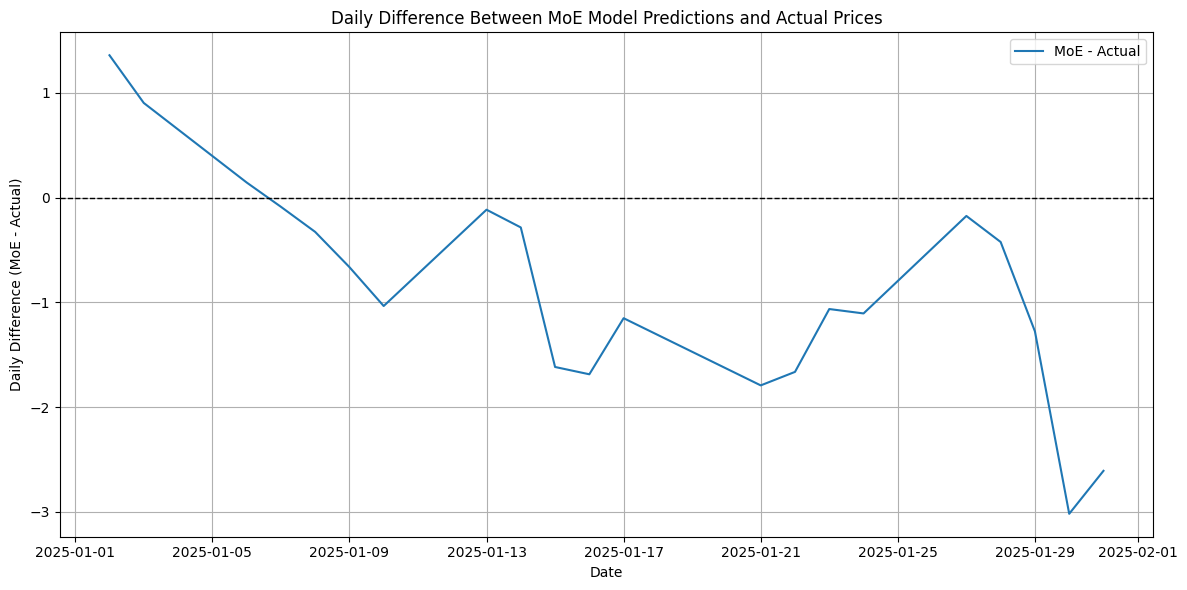


=== Best Polynomial Fit for MoE Curve ===
  Degree = 39,  Validation MSE = 0.031851
  Polynomial Expression:
     y = 0.0000e+00*x^39+0.0000e+00*x^38+0.0000e+00*x^37+0.0000e+00*x^36-2.6424e-139*x^35-7.6394e-136*x^34+3.8571e-131*x^33+1.2857e-126*x^32+2.7625e-122*x^31+4.8064e-118*x^30+6.7300e-114*x^29+6.2452e-110*x^28-2.2746e-106*x^27-3.1266e-101*x^26-1.0694e-96*x^25-2.7408e-92*x^24-6.0657e-88*x^23-1.2082e-83*x^22-2.1542e-79*x^21-3.4202e-75*x^20-4.4425e-71*x^19-3.1954e-67*x^18+6.5225e-63*x^17+3.5926e-58*x^16+1.1309e-53*x^15+2.8612e-49*x^14+6.4377e-45*x^13+1.3187e-40*x^12+2.3834e-36*x^11+3.7917e-32*x^10+4.5347e-28*x^9+1.3401e-24*x^8-1.4587e-19*x^7-6.3753e-15*x^6-1.8462e-10*x^5-4.2583e-06*x^4-7.9869e-02*x^3-9.7196e+02*x^2+7.7314e+06*x+1.0883e+12



/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

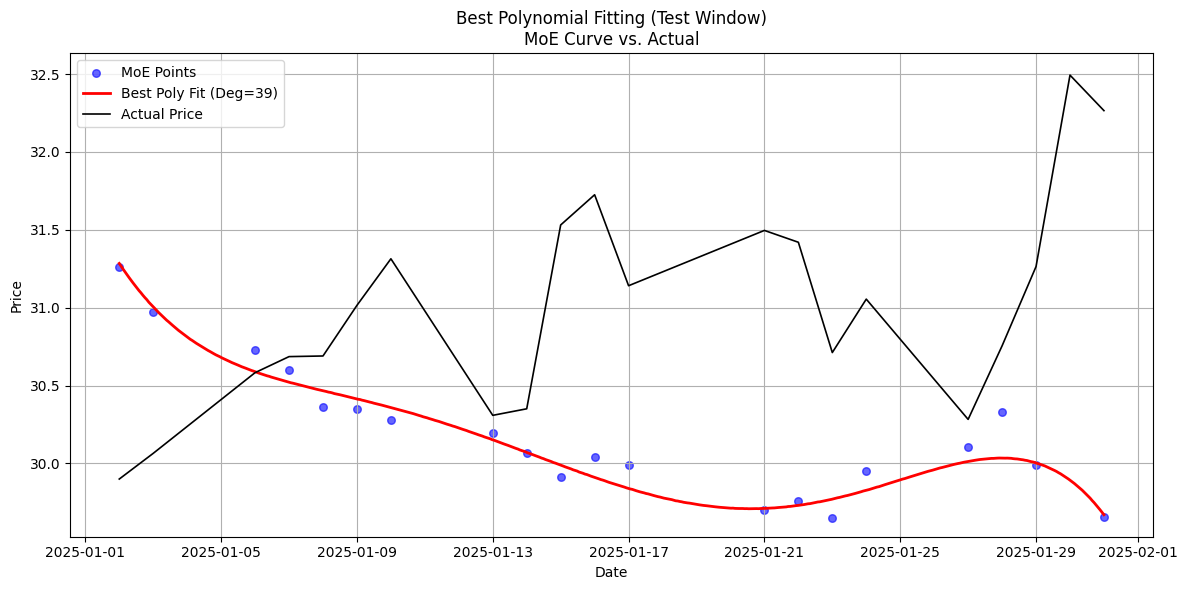

=== Polynomial Derivative Expression for MoE ===
If best polynomial is degree 39, derivative is degree 38:
d/dx of MoE(x) = 0.0000e+00*x^38+0.0000e+00*x^37+0.0000e+00*x^36+0.0000e+00*x^35-9.2484e-138*x^34-2.5974e-134*x^33+1.2728e-129*x^32+4.1142e-125*x^31+8.5639e-121*x^30+1.4419e-116*x^29+1.9517e-112*x^28+1.7487e-108*x^27-6.1413e-105*x^26-8.1292e-100*x^25-2.6735e-95*x^24-6.5779e-91*x^23-1.3951e-86*x^22-2.6581e-82*x^21-4.5239e-78*x^20-6.8404e-74*x^19-8.4407e-70*x^18-5.7516e-66*x^17+1.1088e-61*x^16+5.7481e-57*x^15+1.6963e-52*x^14+4.0056e-48*x^13+8.3691e-44*x^12+1.5824e-39*x^11+2.6217e-35*x^10+3.7917e-31*x^9+4.0812e-27*x^8+1.0721e-23*x^7-1.0211e-18*x^6-3.8252e-14*x^5-9.2310e-10*x^4-1.7033e-05*x^3-2.3961e-01*x^2-1.9439e+03*x+7.7314e+06



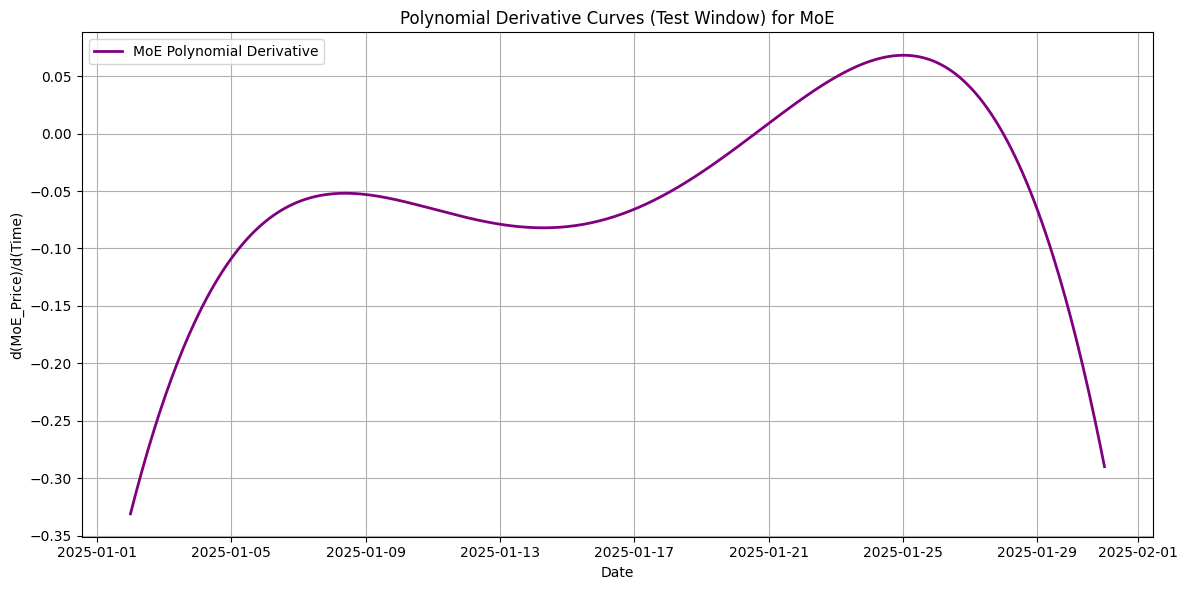

In [6]:
############################################################
# COMPLETE CODE SNIPPET: SUPER ADVANCED MOE w/ POLYNOMIALS
############################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# -----------------------------------------------------------------
# 1) Load the Actual Price Data from "Silver Futures Historical Data_Final Pure Predictions.csv"
# -----------------------------------------------------------------
def load_actual_data(csv_file="Silver Futures Historical Data_Final Pure Predictions.csv"):
    """
    Reads the CSV file containing final actual price data for at least the relevant date range
    (e.g. 2025-01-02..2025-01-31).
    Returns a DataFrame with columns ["Date", "Price"].
    """
    df = pd.read_csv(csv_file)
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    # Remove common extraneous columns if present
    for col in ["Vol.", "Change %"]:
        if col in df.columns:
            df.drop(columns=[col], errors="ignore", inplace=True)
    # Clean up Price column
    if "Price" in df.columns:
        df["Price"] = df["Price"].astype(str).str.replace(",", "", regex=True).astype(float)

    df.sort_values("Date", inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

# -----------------------------------------------------------------
# 2) Polynomial Fitting & Derivative Analysis for MoE
# -----------------------------------------------------------------
def polynomial_fitting_and_derivatives_for_moe(df_moe, df_actual):
    """
    1) Merge the MoE predictions (df_moe) with actual prices (df_actual).
    2) Plot daily difference: (MoE_Price - Actual).
    3) Find the best polynomial fit for the MoE curve (degree 1..65).
    4) Plot the polynomial fit vs. the MoE data & actual data.
    5) Compute & plot the polynomial derivative.
    6) Print polynomial & derivative expressions.
    """

    # =========== A) Merge MoE predictions with actual =============
    df_merge = df_moe.copy()
    # Rename ForecastDate -> Date so we can merge
    df_merge.rename(columns={"ForecastDate": "Date"}, inplace=True)
    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    # Filter actual data to the date range of df_moe
    moe_start = df_merge["Date"].min()
    moe_end   = df_merge["Date"].max()
    mask_test = (df_actual["Date"] >= moe_start) & (df_actual["Date"] <= moe_end)
    df_test_actual = df_actual.loc[mask_test, ["Date", "Price"]].copy()
    df_test_actual.dropna(subset=["Price"], inplace=True)
    df_test_actual.sort_values("Date", inplace=True)
    df_test_actual.reset_index(drop=True, inplace=True)

    # Merge on Date => columns: [Date, MOE_Price, Price (Actual)]
    df_merge = pd.merge(df_merge, df_test_actual, on="Date", how="inner")
    df_merge.rename(columns={"Price": "Actual"}, inplace=True)

    if df_merge.empty:
        print("No overlapping dates between df_moe and df_actual. Cannot do polynomial fitting.")
        return

    # =========== B) Daily Difference Plot =============
    df_merge["MoE_Diff"] = df_merge["MOE_Price"] - df_merge["Actual"]
    plt.figure(figsize=(12,6))
    plt.plot(df_merge["Date"], df_merge["MoE_Diff"], label="MoE - Actual", linewidth=1.5)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel("Date")
    plt.ylabel("Daily Difference (MoE - Actual)")
    plt.title("Daily Difference Between MoE Model Predictions and Actual Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # =========== C) Polynomial Fitting (MoE_Price vs. Date) =============
    # Convert "Date" to numeric axis
    df_merge["mdates_num"] = mdates.date2num(df_merge["Date"])

    # Simple train/validation split: even index => train, odd index => val
    n_points = len(df_merge)
    indices = np.arange(n_points)
    training_mask = (indices % 2 == 0)
    validation_mask = ~training_mask

    x_train = df_merge.loc[training_mask, "mdates_num"].values
    y_train = df_merge.loc[training_mask, "MOE_Price"].values
    x_val   = df_merge.loc[validation_mask, "mdates_num"].values
    y_val   = df_merge.loc[validation_mask, "MOE_Price"].values

    def format_polynomial(coeffs):
        """Helper to convert polynomial coefficients into a readable expression."""
        terms = []
        degree = len(coeffs) - 1
        for i, c in enumerate(coeffs):
            power = degree - i
            if power > 1:
                terms.append(f"{c:+.4e}*x^{power}")
            elif power == 1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr = "".join(terms).replace("+-", "-")
        if expr.startswith("+"):
            expr = expr[1:]
        return expr

    best_degree = None
    best_val_mse = float("inf")
    best_coeffs = None
    degrees = range(1, 66)

    for d in degrees:
        coeffs = np.polyfit(x_train, y_train, d)
        val_preds = np.polyval(coeffs, x_val)
        val_mse = mean_squared_error(y_val, val_preds)
        if val_mse < best_val_mse:
            best_val_mse = val_mse
            best_degree = d
            best_coeffs = coeffs

    poly_expr = format_polynomial(best_coeffs)
    print("\n=== Best Polynomial Fit for MoE Curve ===")
    print(f"  Degree = {best_degree},  Validation MSE = {best_val_mse:.6f}")
    print(f"  Polynomial Expression:\n     y = {poly_expr}\n")

    # =========== D) Plot Best-Fitting Polynomial Curve =============
    x_dense = np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 500)
    y_dense = np.polyval(best_coeffs, x_dense)
    x_dense_dates = [mdates.num2date(xx) for xx in x_dense]

    plt.figure(figsize=(12,6))
    plt.scatter(df_merge["Date"], df_merge["MOE_Price"], color="blue", s=30, alpha=0.6, label="MoE Points")
    plt.plot(x_dense_dates, y_dense, color="red", linewidth=2, label=f"Best Poly Fit (Deg={best_degree})")
    # Also overlay the actual price for reference
    plt.plot(df_merge["Date"], df_merge["Actual"], color="black", linewidth=1.2, label="Actual Price")

    plt.title("Best Polynomial Fitting (Test Window)\nMoE Curve vs. Actual")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # =========== E) Polynomial Derivative =============
    d_coeffs = np.polyder(best_coeffs)  # first derivative
    y_deriv = np.polyval(d_coeffs, x_dense)
    d_expr = format_polynomial(d_coeffs)

    print("=== Polynomial Derivative Expression for MoE ===")
    print(f"If best polynomial is degree {best_degree}, derivative is degree {best_degree - 1}:")
    print(f"d/dx of MoE(x) = {d_expr}\n")

    plt.figure(figsize=(12,6))
    plt.plot(x_dense_dates, y_deriv, color="purple", linewidth=2, label="MoE Polynomial Derivative")
    plt.title("Polynomial Derivative Curves (Test Window) for MoE")
    plt.xlabel("Date")
    plt.ylabel("d(MoE_Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------
# 3) Example Usage in Jupyter
# -----------------------------------------------------------------
if __name__ == "__main__":
    # Suppose you already have df_moe from your SUPER ADVANCED MOE logic
    # => columns: ["ForecastDate", "MOE_Price"]
    # And you want to do polynomial analysis with the actual data from CSV.

    # 1. Load the actual data from the new CSV
    df_actual = load_actual_data("Silver Futures Historical Data_Final Pure Predictions.csv")

    # 2. Suppose df_moe is already computed (like):
    #    df_moe = compute_super_advanced_moe(final_rolling_fc, df_complete_all)
    #    Make sure df_moe has date range overlapping with df_actual

    # 3. Run the polynomial fitting & derivative analysis
    polynomial_fitting_and_derivatives_for_moe(df_moe, df_actual)
